In [1]:
# Training a Simple Machine Learning Model with the Iris Dataset

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set plotting style
sns.set(style="whitegrid")

In [3]:
# Load the cleaned dataset (from the data_preparation notebook)
data = pd.read_csv("cleaned_iris.csv")

In [4]:
# Separate features (X) and target (y)
X = data.iloc[:, :-1]  # Features (sepal/petal measurements)
y = data.iloc[:, -1]   # Target (species)

In [5]:
# Display dataset preview
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width  species
0     -0.900681     1.032057     -1.341272    -1.312977        0
1     -1.143017    -0.124958     -1.341272    -1.312977        0
2     -1.385353     0.337848     -1.398138    -1.312977        0
3     -1.506521     0.106445     -1.284407    -1.312977        0
4     -1.021849     1.263460     -1.341272    -1.312977        0


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (120, 4)
Test set size: (30, 4)


In [7]:
# Train a Classification Model
# Option 1: Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Option 2: Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nModels trained successfully!")


Models trained successfully!


In [8]:
# Evaluate the Models
# Logistic Regression Metrics
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

# Decision Tree Metrics
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Logistic Regression Performance:
Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Decision Tree Performance:
Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



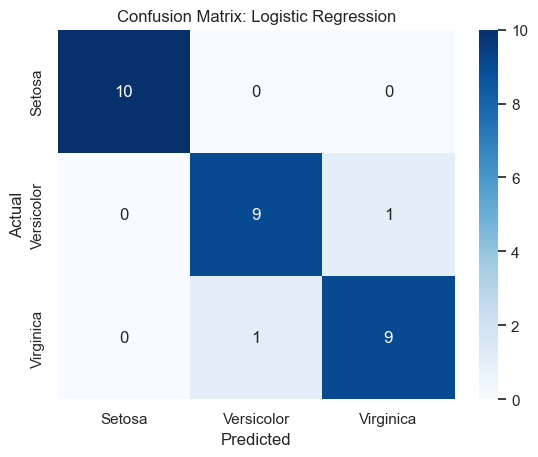

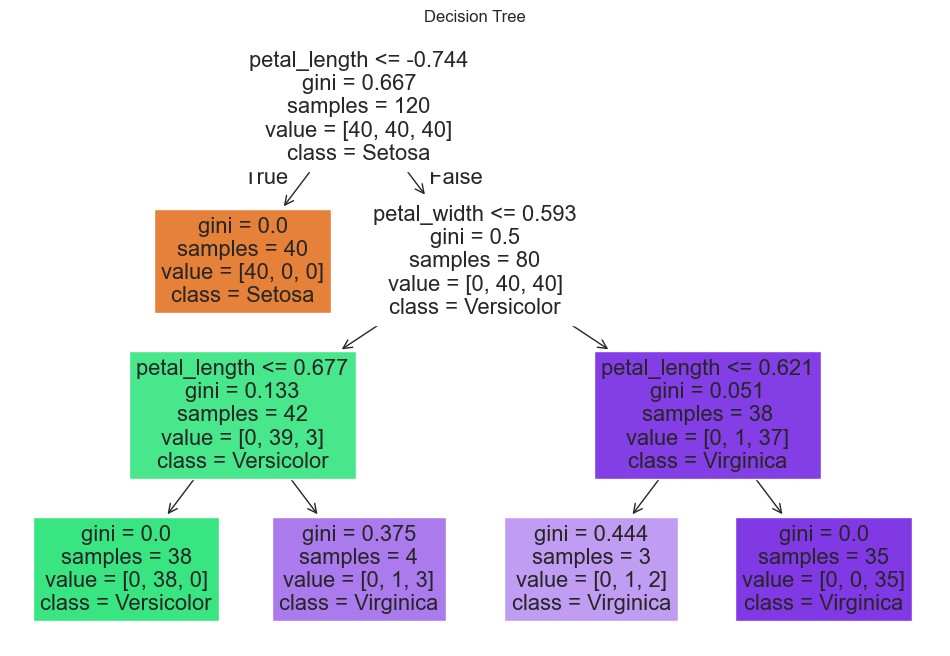

In [9]:
# Visualize Model Performance
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree Visualization (if using Decision Tree)
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True)
plt.title("Decision Tree")
plt.show()